In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\2.concerticcir1.csv",header=None)

In [211]:
data.shape

(100, 3)

In [212]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

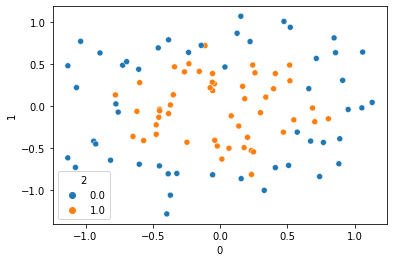

In [213]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [214]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [217]:
x_train.shape

(90, 2)

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
std=StandardScaler()

In [220]:
stdd=std.fit_transform(x_train)

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [221]:
import tensorflow

In [222]:
import tensorflow.keras 

In [223]:
from tensorflow.keras import Sequential

In [224]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [379]:
model=Sequential()
model.add(Dense(1000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [380]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 1000)              3000      
                                                                 
 batch_normalization_84 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_68 (Dropout)        (None, 1000)              0         
                                                                 
 dense_119 (Dense)           (None, 1000)              1001000   
                                                                 
 batch_normalization_85 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_69 (Dropout)        (None, 1000)            

In [381]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [382]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 3s 81ms/step - loss: 1.1769 - accuracy: 0.6667 - val_loss: 2.9849 - val_accuracy: 0.4444
Epoch 2/20
8/8 [==============================] - 0s 47ms/step - loss: 1.2286 - accuracy: 0.6667 - val_loss: 3.1052 - val_accuracy: 0.4444
Epoch 3/20
8/8 [==============================] - 0s 47ms/step - loss: 0.5674 - accuracy: 0.7778 - val_loss: 2.3142 - val_accuracy: 0.4444
Epoch 4/20
8/8 [==============================] - 0s 47ms/step - loss: 0.4893 - accuracy: 0.7778 - val_loss: 1.6061 - val_accuracy: 0.4444
Epoch 5/20
8/8 [==============================] - 0s 47ms/step - loss: 0.7791 - accuracy: 0.6806 - val_loss: 1.3953 - val_accuracy: 0.6111
Epoch 6/20
8/8 [==============================] - 0s 47ms/step - loss: 0.7290 - accuracy: 0.7361 - val_loss: 1.3714 - val_accuracy: 0.6111
Epoch 7/20
8/8 [==============================] - 0s 48ms/step - loss: 0.4712 - accuracy: 0.7500 - val_loss: 0.5037 - val_accuracy: 0.7222
Epoch 8/20
8/8 [===========

In [383]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

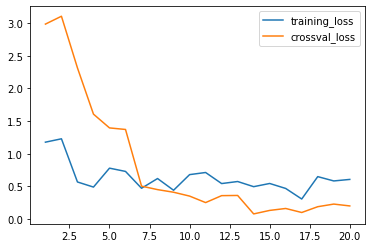

In [384]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [390]:
predi=model.predict(x_train)

3/3 [==============================] - 0s 7ms/step


In [391]:
import numpy as np

In [392]:
preict=np.where(predi>0.5,1,0).flatten()

In [393]:
from sklearn.metrics import accuracy_score

In [394]:
accuracy_score(y_train,preict)


0.8777777777777778

In [395]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 34s 9ms/step


<AxesSubplot:>

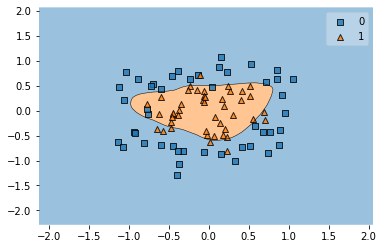

In [396]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)